# Задача №12

Предсказать сорт винограда из которого сделано вино, используя [результаты химических анализов](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) ([описание](http://archive.ics.uci.edu/ml/datasets/Wine) данных), c помощью [KNN](http://www.machinelearning.ru/wiki/index.php?title=Метод_k_ближайших_соседей_%28пример%29) - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [42]:
%matplotlib inline

import requests
import io
import scipy
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Загружаем данные

In [43]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data = requests.get(url)
assert data.status_code == 200

### Конвертируем датасет в обучучающую и тестирующую выборки

In [47]:
dataset = scipy.genfromtxt(
    io.StringIO(data.text),
    delimiter=',',
    dtype=[('class', scipy.int8), ('features', scipy.float64, (13,))]
)

x = [item[1] for item in dataset]
y = [item[0] for item in dataset]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Обучение модели

In [48]:
neighbors = range(1, 21)
means = {}

for metric in ('euclidean', 'manhattan', 'chebyshev'):
    current_means = []
    for k in neighbors:
        classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        classifier.fit(x_train, y_train)
        prediction = classifier.predict(x_test)
        
        current_means.append(scipy.mean(prediction == y_test))
    
    means[metric] = current_means


### Построение графика

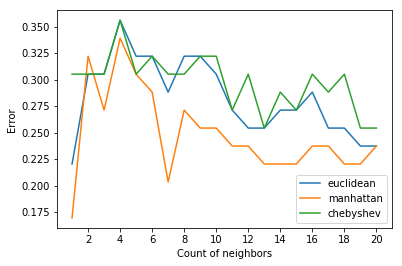

In [49]:
for metric, current_means in means.items():
    errors = [1 - mean for mean in current_means]
    plt.plot(neighbors, errors, label=metric)
    
plt.xticks(neighbors[1::2])
plt.xlabel('Count of neighbors')
plt.ylabel('Error')
plt.legend(loc='lower right')
plt.show()

В качестве метрик рассматривались:
- Евклидова норма(euclidean)
- Сумма модулей(manhattan)
- Максимум модулей(chebyshev)

Количество ближайших соседей neighbors варьировалось от 1 до 20

### Вывод
Метрика manhattan достаточно хорошо работает при neighbors >= 7